In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
#CHARGES
c1 = pd.read_csv('extract_public_2010_20190723110816_charges_20100101-20100317Texas.csv')
c2 = pd.read_csv('extract_public_2010_20190723110816_charges_20100318-20100530Texas.csv')
c3 = pd.read_csv('extract_public_2010_20190723110816_charges_20100531-20100817Texas.csv')
c4 = pd.read_csv('extract_public_2010_20190723110816_charges_20100818-20101102Texas.csv')
c5 = pd.read_csv('extract_public_2010_20190723110816_charges_20101103-20101230Texas.csv')



dfc1 = pd.DataFrame(c1)
dfc2 = pd.DataFrame(c2)
dfc3 = pd.DataFrame(c3)
dfc4 = pd.DataFrame(c4)
dfc5 = pd.DataFrame(c5)


dfc = pd.concat([dfc1, dfc2, dfc3, dfc4, dfc5])

#Choosing columns
dfc = dfc[['Crash_ID', 'Charge', 'Unit_Nbr','Prsn_Nbr']]
dfc = dfc.set_index(['Crash_ID', 'Unit_Nbr', 'Prsn_Nbr'])
dfc

Charge
Crash_ID Unit_Nbr Prsn_Nbr                                           
11152318 1        1                   OPERATING A VEHICLE W/O LICENSE
                  2                                        NO CHARGES
         2        1         FAIL TO YEILD RIGHT OF WAY FROM STOP SIGN
                  1                  DRIVING WHILE LICENSE IS INVALID
11152319 1        1                                        NO CHARGES
...                                                               ...
16657580 1        1               NO PROOF OF FINANCIAL RESPOSIBILITY
         2        1                                        NO CHARGES
16657582 1        1                                        NO CHARGES
16657583 1        1                                        NO CHARGES
16685747 1        1                         DRIVING WHILE INTOXICATED

[1328123 rows x 1 columns]

In [3]:
#CRASH
cr1 = pd.read_csv('extract_public_2010_20190723110816_crash_20100101-20100317Texas.csv', low_memory=False)
cr2 = pd.read_csv('extract_public_2010_20190723110816_crash_20100318-20100530Texas.csv', low_memory=False)
cr3 = pd.read_csv('extract_public_2010_20190723110816_crash_20100531-20100817Texas.csv', low_memory=False)
cr4 = pd.read_csv('extract_public_2010_20190723110816_crash_20100818-20101102Texas.csv', low_memory=False)
cr5 = pd.read_csv('extract_public_2010_20190723110816_crash_20101103-20101230Texas.csv', low_memory=False)



dfcr1 = pd.DataFrame(cr1)
dfcr2 = pd.DataFrame(cr2)
dfcr3 = pd.DataFrame(cr3)
dfcr4 = pd.DataFrame(cr4)
dfcr5 = pd.DataFrame(cr5)


dfcr = pd.concat([dfcr1, dfcr2, dfcr3, dfcr4, dfcr5])

In [4]:
#CRASH_variable selection

dfcr = dfcr[['Crash_ID',
'Crash_Fatal_Fl',
'Schl_Bus_Fl',
'Rr_Relat_Fl',
'Medical_Advisory_Fl',
'Crash_Date',
'Crash_Time',
'Rpt_CRIS_Cnty_ID',
'Thousand_Damage_Fl',
'Rpt_Rdwy_Sys_ID',
'Rpt_Hwy_Num',
'Crash_Speed_Limit',
'Road_Constr_Zone_Fl',
'Wthr_Cond_ID',
'Light_Cond_ID',
'Road_Type_ID',
'Surf_Cond_ID',
'Harm_Evnt_ID',
'Obj_Struck_ID',
'Othr_Factr_ID',
'Road_Part_Adj_ID',
'Phys_Featr_1_ID',
'Txdot_Rptable_Fl',
'Pop_Group_ID',
'Day_of_Week',
'Rural_Urban_Type_ID',
'Sus_Serious_Injry_Cnt',
'Nonincap_Injry_Cnt',
'Poss_Injry_Cnt',
'Non_Injry_Cnt',
'Unkn_Injry_Cnt',
'Tot_Injry_Cnt',
'Death_Cnt'
]]

dfcr = dfcr.set_index('Crash_ID')

In [5]:
dfcr = dfcr.replace({'Crash_Fatal_Fl':{
-2:'INVALID',
-1:'NO DATA',
1:'YES',
2:'NO',
4:'NOT COLLECTED',
99:'UNKNOWN'}})

dfcr = dfcr.replace({'Rpt_CRIS_Cnty_ID':{
1:'ANDERSON',
2:'ANDREWS',
3:'ANGELINA',
4:'ARANSAS',
5:'ARCHER',
6:'ARMSTRONG',
1:'ANDERSON',
8:'AUSTIN',
9:'BAILEY',
10:'BANDERA',
11:'BASTROP',
12:'BAYLOR',
13:'BEE',
14:'BELL',
15:'BEXAR',
16:'BLANCO',
17:'BORDEN',
18:'BOSQUE',
19:'BOWIE',
20:'BRAZORIA',
21:'BRAZOS',
22:'BREWSTER',
23:'BRISCOE',
24:'BROOKS',
25:'BROWN',
26:'BURLESON',
27:'BURNET',
28:'CALDWELL',
29:'CALHOUN',
30:'CALLAHAN',
31:'CAMERON',
32:'CAMP',
33:'CARSON',
34:'CASS',
35:'CASTRO',
36:'CHAMBERS',
37:'CHEROKEE',
38:'CHILDRESS',
39:'CLAY',
40:'COCHRAN',
41:'COKE',
42:'COLEMAN',
43:'COLLIN',
44:'COLLINGSWORTH',
45:'COLORADO',
46:'COMAL',
47:'COMANCHE',
48:'CONCHO',
49:'COOKE',
50:'CORYELL',
51:'COTTLE',
52:'CRANE',
53:'CROCKETT',
54:'CROSBY',
55:'CULBERSON',
56:'DALLAM',
57:'DALLAS',
58:'DAWSON',
59:'DEAF SMITH',
60:'DELTA',
61:'DENTON',
62:'DEWITT',
63:'DICKENS',
64:'DIMMIT',
65:'DONLEY',
66:'DUVAL',
67:'EASTLAND',
68:'ECTOR',
69:'EDWARDS',
70:'ELLIS',
71:'EL PASO',
72:'ERATH',
73:'FALLS',
74:'FANNIN',
75:'FAYETTE',
76:'FISHER',
77:'FLOYD',
78:'FOARD',
79:'FORT BEND',
80:'FRANKLIN',
81:'FREESTONE',
82:'FRIO',
83:'GAINES',
84:'GALVESTON',
85:'GARZA',
86:'GILLESPIE',
87:'GLASSCOCK',
88:'GOLIAD',
89:'GONZALES',
90:'GRAY',
91:'GRAYSON',
92:'GREGG',
93:'GRIMES',
94:'GUADALUPE',
95:'HALE',
96:'HALL',
97:'HAMILTON',
98:'HANSFORD',
99:'HARDEMAN',
100:'HARDIN',
101:'HARRIS',
102:'HARRISON',
103:'HARTLEY',
104:'HASKELL',
105:'HAYS',
106:'HEMPHILL',
107:'HENDERSON',
108:'HIDALGO',
109:'HILL',
110:'HOCKLEY',
111:'HOOD',
112:'HOPKINS',
113:'HOUSTON',
114:'HOWARD',
115:'HUDSPETH',
116:'HUNT',
117:'HUTCHINSON',
118:'IRION',
119:'JACK',
120:'JACKSON',
121:'JASPER',
122:'JEFF DAVIS',
123:'JEFFERSON',
124:'JIM HOGG',
125:'JIM WELLS',
126:'JOHNSON',
127:'JONES',
128:'KARNES',
129:'KAUFMAN',
130:'KENDALL',
131:'KENEDY',
132:'KENT',
133:'KERR',
134:'KIMBLE',
135:'KING',
136:'KINNEY',
137:'KLEBERG',
138:'KNOX',
139:'LAMAR',
140:'LAMB',
141:'LAMPASAS',
142:'LA SALLE',
143:'LAVACA',
144:'LEE',
145:'LEON',
146:'LIBERTY',
147:'LIMESTONE',
148:'LIPSCOMB',
149:'LIVE OAK',
150:'LLANO',
151:'LOVING',
152:'LUBBOCK',
153:'LYNN',
154:'MADISON',
155:'MARION',
156:'MARTIN',
157:'MASON',
158:'MATAGORDA',
159:'MAVERICK',
160:'MCCULLOCH',
161:'MCLENNAN',
162:'MCMULLEN',
163:'MEDINA',
164:'MENARD',
165:'MIDLAND',
166:'MILAM',
167:'MILLS',
168:'MITCHELL',
169:'MONTAGUE',
170:'MONTGOMERY',
171:'MOORE',
172:'MORRIS',
173:'MOTLEY',
174:'NACOGDOCHES',
175:'NAVARRO',
176:'NEWTON',
177:'NOLAN',
178:'NUECES',
179:'OCHILTREE',
180:'OLDHAM',
181:'ORANGE',
182:'PALO PINTO',
183:'PANOLA',
184:'PARKER',
185:'PARMER',
186:'PECOS',
187:'POLK',
188:'POTTER',
189:'PRESIDIO',
190:'RAINS',
191:'RANDALL',
192:'REAGAN',
193:'REAL',
194:'RED RIVER',
195:'REEVES',
196:'REFUGIO',
197:'ROBERTS',
198:'ROBERTSON',
199:'ROCKWALL',
200:'RUNNELS',
201:'RUSK',
202:'SABINE',
203:'SAN AUGUSTINE',
204:'SAN JACINTO',
205:'SAN PATRICIO',
206:'SAN SABA',
207:'SCHLEICHER',
208:'SCURRY',
209:'SHACKELFORD',
210:'SHELBY',
211:'SHERMAN',
212:'SMITH',
213:'SOMERVELL',
214:'STARR',
215:'STEPHENS',
216:'STERLING',
217:'STONEWALL',
218:'SUTTON',
219:'SWISHER',
220:'TARRANT',
221:'TAYLOR',
222:'TERRELL',
223:'TERRY',
224:'THROCKMORTON',
225:'TITUS',
226:'TOM GREEN',
227:'TRAVIS',
228:'TRINITY',
229:'TYLER',
230:'UPSHUR',
231:'UPTON',
232:'UVALDE',
233:'VAL VERDE',
234:'VAN ZANDT',
235:'VICTORIA',
236:'WALKER',
237:'WALLER',
238:'WARD',
239:'WASHINGTON',
240:'WEBB',
241:'WHARTON',
242:'WHEELER',
243:'WICHITA',
244:'WILBARGER',
245:'WILLACY',
246:'WILLIAMSON',
247:'WILSON',
248:'WINKLER',
249:'WISE',
250:'WOOD',
251:'YOAKUM',
252:'YOUNG',
253:'ZAPATA',
254:'ZAVALA'}})

dfcr = dfcr.replace({'Rpt_Rdwy_Sys_ID':{
-2:'INVALID',
-1:'NO DATA',
1:'INTERSTATE',
2:'US HIGHWAY',
3:'STATE HIGHWAY',
4:'FARM TO MARKET',
5:'RANCH ROAD',
6:'RANCH TO MARKET',
7:'BUSINESS INTERSTATE',
8:'BUSINESS US',
9:'BUSINESS STATE',
10:'BUSINESS FM',
11:'STATE LOOP',
12:'TOLL ROAD',
13:'ALTERNATE',
14:'SPUR',
15:'COUNTY ROAD',
16:'PARK ROAD',
17:'PRIVATE ROAD',
18:'RECREATIONAL ROAD',
19:'LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.'}})

dfcr = dfcr.replace({'Light_Cond_ID':{
0:'UNKNOWN',
1:'DAYLIGHT',
2:'DAWN',
3:'DARK, NOT LIGHTED',
4:'DARK, LIGHTED',
5:'DUSK',
6:'DARK, UNKNOWN LIGHTING',
8:'OTHER (EXPLAIN IN NARRATIVE)'}})

dfcr = dfcr.replace({'Wthr_Cond_ID':{
0:'UNKNOWN',
2:'RAIN',
3:'SLEET/HAIL',
4:'SNOW',
5:'FOG',
6:'BLOWING SAND/SNOW',
7:'SEVERE CROSSWINDS',
8:'OTHER (EXPLAIN IN NARRATIVE)',
11:'CLEAR',
12:'CLOUDY'}})

dfcr = dfcr.replace({'Surf_Cond_ID':{
0:'UNKNOWN',
1:'DRY',
2:'DRY',
3:'STANDING WATER',
5:'SLUSH',
6:'ICE',
8:'OTHER (EXPLAIN IN NARRATIVE)',
9:'SNOW',
10:'SAND, MUD, DIRT'}})

dfcr = dfcr.replace({'Pop_Group_ID':{
0:'RURAL',
1:'TOWN UNDER 2,499 POP',
3:'2,500 - 4,999 POP',
4:'5,000 - 9,999 POP',
5:'10,000 - 24,999 POP',
6:'25,000 - 49,999 POP',
7:'50,000 - 99,999 POP',
8:'100,000 - 249,999 POP',
9:'250,000 POP AND OVER',
10:'NOT APPLICABLE'}})




dfcr.sort_index().head(50)

,Crash_Fatal_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Crash_Date,Crash_Time,Rpt_CRIS_Cnty_ID,Thousand_Damage_Fl,Rpt_Rdwy_Sys_ID,Rpt_Hwy_Num,...,Pop_Group_ID,Day_of_Week,Rural_Urban_Type_ID,Sus_Serious_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt
Crash_ID,,,,,,,,,,,,,,,,,,,,,
11152318,N,N,N,N,01/19/2010,10:02 AM,MIDLAND,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",NaN,...,"100,000 - 249,999 POP",TUE,NaN,0,0,0,3,0,0,0
11152319,N,N,N,N,01/19/2010,11:30 AM,MIDLAND,Y,BUSINESS STATE,158,...,"100,000 - 249,999 POP",TUE,3.0,0,0,0,7,0,0,0
11152320,N,N,N,N,01/19/2010,04:36 PM,MIDLAND,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",NaN,...,"100,000 - 249,999 POP",TUE,NaN,1,0,0,3,0,1,0
11152327,N,N,N,N,01/23/2010,01:53 PM,TARRANT,N,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",NaN,...,"25,000 - 49,999 POP",SAT,NaN,0,0,0,1,0,0,0
11152328,N,N,N,N,01/24/2010,10:55 PM,COLLIN,Y,COUNTY ROAD,430,...,"25,000 - 49,999 POP",SUN,NaN,0,0,0,2,0,0,0
11152331,N,N,N,N,01/20/2010,03:55 PM,DENTON,Y,INTERSTATE,35,...,"100,000 - 249,999 POP",WED,4.0,0,0,0,2,0,0,0
11152333,N,N,N,N,01/26/2010,10:44 PM,HARRIS,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",NaN,...,"50,000 - 99,999 POP",TUE,4.0,0,0,2,2,0,2,0
11152338,N,N,N,N,01/08/2010,01:44 AM,BEXAR,Y,INTERSTATE,35,...,"250,000 POP AND OVER",FRI,4.0,0,0,0,2,0,0,0
11152344,N,N,N,N,01/08/2010,07:41 AM,BEXAR,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",NaN,...,"250,000 POP AND OVER",FRI,NaN,0,0,0,4,0,0,0


In [6]:
#DAMAGES
d1 = pd.read_csv('extract_public_2010_20190723110816_damages_20100101-20100317Texas.csv')
d2 = pd.read_csv('extract_public_2010_20190723110816_damages_20100318-20100530Texas.csv')
d3 = pd.read_csv('extract_public_2010_20190723110816_damages_20100531-20100817Texas.csv')
d4 = pd.read_csv('extract_public_2010_20190723110816_damages_20100818-20101102Texas.csv')
d5 = pd.read_csv('extract_public_2010_20190723110816_damages_20101103-20101230Texas.csv')



dfd1 = pd.DataFrame(d1)
dfd2 = pd.DataFrame(d2)
dfd3 = pd.DataFrame(d3)
dfd4 = pd.DataFrame(d4)
dfd5 = pd.DataFrame(d5)


dfd = pd.concat([dfd1, dfd2, dfd3, dfd4, dfd5])

In [7]:
#DAMAGES_variable selection

dfd = dfd[['Damaged_Property', 'Crash_ID']]

dfd = dfd.set_index('Crash_ID')
dfd

,Damaged_Property
Crash_ID,
11152346,"STEEL POLES, FLOWER BED, SPIGOT"
11152347,STREET SIGN
11152348,GUARD FENCE
11152351,LANSCAPING/TREES
11152357,WOOD LIGHT POLE
...,...
16648235,STATE HIGHWAY SIGN
16648237,FENCE
16648241,REFLECTIVE POLE


In [8]:
#PERSON
p1 = pd.read_csv('extract_public_2010_20190723110816_person_20100318-20100530Texas.csv', low_memory=False)
p2 = pd.read_csv('extract_public_2010_20190723110816_person_20100531-20100817Texas.csv', low_memory=False)
p3 = pd.read_csv('extract_public_2010_20190723110816_person_20100818-20101102Texas.csv', low_memory=False)
p4 = pd.read_csv('extract_public_2010_20190723110816_person_20101103-20101230Texas.csv', low_memory=False)
p5 = pd.read_csv('extract_public_2010_20190723110816_person_20100101-20100317Texas.csv', low_memory=False)



dfp1 = pd.DataFrame(p1)
dfp2 = pd.DataFrame(p2)
dfp3 = pd.DataFrame(p3)
dfp4 = pd.DataFrame(p4)
dfp5 = pd.DataFrame(p5)


dfp = pd.concat([dfp1, dfp2, dfp3, dfp4, dfp5])



In [9]:
#PERSON_variable selection

dfp = dfp[['Crash_ID',
'Unit_Nbr',
'Prsn_Nbr',
'Prsn_Type_ID',
'Prsn_Injry_Sev_ID',
'Prsn_Age',
'Prsn_Ethnicity_ID',
'Prsn_Gndr_ID',
'Prsn_Rest_ID',
'Prsn_Airbag_ID',
'Prsn_Helmet_ID',
'Sus_Serious_Injry_Cnt',
'Nonincap_Injry_Cnt',
'Poss_Injry_Cnt',
'Non_Injry_Cnt',
'Unkn_Injry_Cnt',
'Tot_Injry_Cnt',
'Death_Cnt'
]]



In [10]:
#PERSON_decoding

dfp = dfp.replace({'Prsn_Type_ID':{
-2:'INVALID',
-1:'NO DATA',
1:'DRIVER',
2:'PASSENGER/OCCUPANT',
3:'PEDALCYCLIST',
4:'PEDESTRIAN',
5:'DRIVER OF MOTORCYCLE TYPE VEHICLE',
6:'PASSENGER/OCCUPANT ON MOTORCYCLE TYPE VEHICLE',
97:'NOT APPLICABLE',
98:'OTHER (EXPLAIN IN NARRATIVE)',
99:'UNKNOWN'}})

dfp = dfp.replace({'Prsn_Injry_Sev_ID':{0:'UNKNOWN',
1:'INCAPACITATING INJURY',
1:'SUSPECTED SERIOUS INJURY',
2:'NON-INCAPACITATING INJURY',
2:'SUSPECTED MINOR INJURY',
3:'POSSIBLE INJURY',
4:'KILLED',
4:'FATAL INJURY',
5:'NOT INJURED'}})

dfp = dfp.replace({'Prsn_Ethnicity_ID':{
0:'UNKNOWN',
1:'WHITE',
2:'HISPANIC',
3:'BLACK',
4:'ASIAN',
5:'OTHER',
6:'AMER. INDIAN/ALASKAN NATIVE'}})

dfp = dfp.replace({'Prsn_Gndr_ID':{
0:'UNKNOWN',
1:'MALE',
2:'FEMALE'}})

dfp = dfp.replace({'Prsn_Rest_ID':{
1:'SHOULDER & LAP BELT',
2:'SHOULDER BELT ONLY',
3:'LAP BELT ONLY',
4:'CHILD SEAT, FACING FORWARD',
5:'CHILD SEAT, FACING REAR',
6:'CHILD SEAT, UNKNOWN',
7:'CHILD BOOSTER SEAT',
8:'NONE',
9:'OTHER (EXPLAIN IN NARRATIVE)',
10:'UNKNOWN',
11:'NOT APPLICABLE'}})

dfp = dfp.replace({'Prsn_Airbag_ID':{
0:'UNKNOWN',
1:'NOT APPLICABLE',
2:'NOT DEPLOYED',
3:'DEPLOYED, FRONT',
4:'DEPLOYED, SIDE',
7:'DEPLOYED, REAR',
8:'DEPLOYED, MULTIPLE'}})

dfp = dfp.replace({'Prsn_Helmet_ID':{
1:'WORN, DAMAGED',
2:'WORN, NOT DAMAGED',
3:'WORN, UNK DAMAGE',
4:'NOT WORN',
5:'UNKNOWN IF WORN',
97:'NOT APPLICABLE'}})


dfp['Prsn_Alc_Rslt_ID'] = 'NOT DRIVER'
dfp['Prsn_Drg_Rslt_ID'] = 'NOT DRIVER'
dfp['Drvr_Lic_Type_ID'] = 'NOT DRIVER'



dfp = dfp.set_index(['Crash_ID', 'Unit_Nbr', 'Prsn_Nbr'])


dfp

Prsn_Type_ID Prsn_Injry_Sev_ID  Prsn_Age  \
Crash_ID Unit_Nbr Prsn_Nbr                                                   
11232288 1        2         PASSENGER/OCCUPANT       NOT INJURED      17.0   
11239108 1        2         PASSENGER/OCCUPANT   POSSIBLE INJURY      17.0   
         3        2         PASSENGER/OCCUPANT   POSSIBLE INJURY      18.0   
11239848 1        2         PASSENGER/OCCUPANT       NOT INJURED      78.0   
11240049 1        2         PASSENGER/OCCUPANT       NOT INJURED      12.0   
...                                        ...               ...       ...   
16919336 1        23        PASSENGER/OCCUPANT       NOT INJURED      16.0   
                  24        PASSENGER/OCCUPANT       NOT INJURED      16.0   
         2        2         PASSENGER/OCCUPANT       NOT INJURED      30.0   
                  3         PASSENGER/OCCUPANT       NOT INJURED      16.0   
                  4         PASSENGER/OCCUPANT       NOT INJURED      16.0   

                           Prsn_Ethnicity_ID Prsn_Gndr_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                  
11232288 1        2                    WHITE         MALE   
11239108 1        2                    WHITE         MALE   
         3        2                    WHITE       FEMALE   
11239848 1        2                    WHITE         MALE   
11240049 1        2                 HISPANIC       FEMALE   
...                                      ...          ...   
16919336 1        23                HISPANIC       FEMALE   
                  24                HISPANIC       FEMALE   
         2        2                 HISPANIC       FEMALE   
                  3                 HISPANIC       FEMALE   
                  4                 HISPANIC       FEMALE   

                                   Prsn_Rest_ID      Prsn_Airbag_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                            
11232288 1        2         SHOULDER & LAP BELT  DEPLOYED, MULTIPLE   
11239108 1        2         SHOULDER & LAP BELT     DEPLOYED, FRONT   
         3        2         SHOULDER & LAP BELT        NOT DEPLOYED   
11239848 1        2         SHOULDER & LAP BELT        NOT DEPLOYED   
11240049 1        2         SHOULDER & LAP BELT        NOT DEPLOYED   
...                                         ...                 ...   
16919336 1        23                       NONE      NOT APPLICABLE   
                  24                       NONE      NOT APPLICABLE   
         2        2         SHOULDER & LAP BELT      NOT APPLICABLE   
                  3         SHOULDER & LAP BELT      NOT APPLICABLE   
                  4         SHOULDER & LAP BELT      NOT APPLICABLE   

                            Prsn_Helmet_ID  Sus_Serious_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                          
11232288 1        2         NOT APPLICABLE                      0   
11239108 1        2         NOT APPLICABLE                      0   
         3        2         NOT APPLICABLE                      0   
11239848 1        2         NOT APPLICABLE                      0   
11240049 1        2         NOT APPLICABLE                      0   
...                                    ...                    ...   
16919336 1        23        NOT APPLICABLE                      0   
                  24        NOT APPLICABLE                      0   
         2        2         NOT APPLICABLE                      0   
                  3         NOT APPLICABLE                      0   
                  4         NOT APPLICABLE                      0   

                            Nonincap_Injry_Cnt  Poss_Injry_Cnt  Non_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                                      
11232288 1        2                          0               0              1   
11239108 1        2                          0               1              0   
         3        2                          0               1              0  

In [11]:
#PRIMARYPERSON
pr1 = pd.read_csv('extract_public_2010_20190723110816_primaryperson_20100101-20100317Texas.csv', low_memory=False)
pr2 = pd.read_csv('extract_public_2010_20190723110816_primaryperson_20100318-20100530Texas.csv', low_memory=False)
pr3 = pd.read_csv('extract_public_2010_20190723110816_primaryperson_20100531-20100817Texas.csv', low_memory=False)
pr4 = pd.read_csv('extract_public_2010_20190723110816_primaryperson_20100818-20101102Texas.csv', low_memory=False)
pr5 = pd.read_csv('extract_public_2010_20190723110816_primaryperson_20101103-20101230Texas.csv', low_memory=False)


dfpr1 = pd.DataFrame(pr1)
dfpr2 = pd.DataFrame(pr2)
dfpr3 = pd.DataFrame(pr3)
dfpr4 = pd.DataFrame(pr4)
dfpr5 = pd.DataFrame(pr5)

dfpr = pd.concat([dfpr1, dfpr2, dfpr3, dfpr4, dfpr5])

In [12]:
#PRIMARYPERSON_variable selection

dfpr = dfpr[['Crash_ID',
'Unit_Nbr',
'Prsn_Nbr',
'Prsn_Type_ID',
'Prsn_Injry_Sev_ID',
'Prsn_Age',
'Prsn_Ethnicity_ID',
'Prsn_Gndr_ID',
'Prsn_Rest_ID',
'Prsn_Airbag_ID',
'Prsn_Helmet_ID',
'Prsn_Alc_Rslt_ID',
'Prsn_Drg_Rslt_ID',
'Sus_Serious_Injry_Cnt',
'Nonincap_Injry_Cnt',
'Poss_Injry_Cnt',
'Non_Injry_Cnt',
'Unkn_Injry_Cnt',
'Tot_Injry_Cnt',
'Death_Cnt',
'Drvr_Lic_Type_ID'
]]



dfpr

,Crash_ID,Unit_Nbr,Prsn_Nbr,Prsn_Type_ID,Prsn_Injry_Sev_ID,Prsn_Age,Prsn_Ethnicity_ID,Prsn_Gndr_ID,Prsn_Rest_ID,Prsn_Airbag_ID,...,Prsn_Alc_Rslt_ID,Prsn_Drg_Rslt_ID,Sus_Serious_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,Drvr_Lic_Type_ID
0,11152318,1,1,1.0,5.0,45.0,3.0,2.0,1.0,2.0,...,NaN,97.0,0,0,0,1,0,0,0,1.0
1,11152318,2,1,1.0,5.0,51.0,1.0,1.0,1.0,2.0,...,NaN,97.0,0,0,0,1,0,0,0,9.0
2,11152319,1,1,1.0,5.0,17.0,3.0,1.0,1.0,2.0,...,NaN,97.0,0,0,0,1,0,0,0,9.0
3,11152319,2,1,1.0,5.0,16.0,2.0,2.0,1.0,2.0,...,NaN,97.0,0,0,0,1,0,0,0,9.0
4,11152320,1,1,1.0,1.0,17.0,1.0,2.0,1.0,3.0,...,NaN,97.0,1,0,0,0,0,1,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134322,16657580,1,1,1.0,5.0,17.0,2.0,2.0,1.0,3.0,...,NaN,97.0,0,0,0,1,0,0,0,8.0
134323,16657580,2,1,1.0,5.0,57.0,2.0,1.0,1.0,1.0,...,NaN,97.0,0,0,0,1,0,0,0,4.0
134324,16657582,1,1,1.0,5.0,53.0,2.0,2.0,1.0,1.0,...,NaN,97.0,0,0,0,1,0,0,0,4.0
134325,16657583,1,1,99.0,0.0,NaN,0.0,0.0,10.0,0.0,...,NaN,97.0,0,0,0,0,1,0,0,99.0


In [13]:
#PRIMARYPERSON_decoding

dfpr = dfpr.replace({'Prsn_Type_ID':{
-2:'INVALID',
-1:'NO DATA',
1:'DRIVER',
2:'PASSENGER/OCCUPANT',
3:'PEDALCYCLIST',
4:'PEDESTRIAN',
5:'DRIVER OF MOTORCYCLE TYPE VEHICLE',
6:'PASSENGER/OCCUPANT ON MOTORCYCLE TYPE VEHICLE',
97:'NOT APPLICABLE',
98:'OTHER (EXPLAIN IN NARRATIVE)',
99:'UNKNOWN'}})

dfpr = dfpr.replace({'Prsn_Injry_Sev_ID':{0:'UNKNOWN',
1:'INCAPACITATING INJURY',
1:'SUSPECTED SERIOUS INJURY',
2:'NON-INCAPACITATING INJURY',
2:'SUSPECTED MINOR INJURY',
3:'POSSIBLE INJURY',
4:'KILLED',
4:'FATAL INJURY',
5:'NOT INJURED'}})

dfpr = dfpr.replace({'Prsn_Ethnicity_ID':{
0:'UNKNOWN',
1:'WHITE',
2:'HISPANIC',
3:'BLACK',
4:'ASIAN',
5:'OTHER',
6:'AMER. INDIAN/ALASKAN NATIVE'}})

dfpr = dfpr.replace({'Prsn_Gndr_ID':{
0:'UNKNOWN',
1:'MALE',
2:'FEMALE'}})

dfpr = dfpr.replace({'Prsn_Rest_ID':{
1:'SHOULDER & LAP BELT',
2:'SHOULDER BELT ONLY',
3:'LAP BELT ONLY',
4:'CHILD SEAT, FACING FORWARD',
5:'CHILD SEAT, FACING REAR',
6:'CHILD SEAT, UNKNOWN',
7:'CHILD BOOSTER SEAT',
8:'NONE',
9:'OTHER (EXPLAIN IN NARRATIVE)',
10:'UNKNOWN',
11:'NOT APPLICABLE'}})

dfpr = dfpr.replace({'Prsn_Airbag_ID':{
0:'UNKNOWN',
1:'NOT APPLICABLE',
2:'NOT DEPLOYED',
3:'DEPLOYED, FRONT',
4:'DEPLOYED, SIDE',
7:'DEPLOYED, REAR',
8:'DEPLOYED, MULTIPLE'}})

dfpr = dfpr.replace({'Prsn_Helmet_ID':{
1:'WORN, DAMAGED',
2:'WORN, NOT DAMAGED',
3:'WORN, UNK DAMAGE',
4:'NOT WORN',
5:'UNKNOWN IF WORN',
97:'NOT APPLICABLE'}})

dfpr = dfpr.replace({'Prsn_Alc_Rslt_ID':{
0:'Unknown',
1:'Positive',
2:'Negative',
97:'Not Applicable'}})    

dfpr = dfpr.replace({'Prsn_Drg_Rslt_ID':{
0:'Unknown',
1:'Positive',
2:'Negative',
97:'Not Applicable'}}) 

dfpr = dfpr.replace({'Drvr_Lic_Type_ID':{
1:'ID CARD',
4:'COMMERCIAL DRIVER LIC.',
8:'UNLICENSED',
9:'DRIVER LICENSE',
10:'OCCUPATIONAL',
98:'OTHER',
99:'UNKNOWN'}})

dfpr = dfpr.set_index(['Crash_ID', 'Unit_Nbr', 'Prsn_Nbr'])

dfpr

Prsn_Type_ID         Prsn_Injry_Sev_ID  Prsn_Age  \
Crash_ID Unit_Nbr Prsn_Nbr                                                    
11152318 1        1              DRIVER               NOT INJURED      45.0   
         2        1              DRIVER               NOT INJURED      51.0   
11152319 1        1              DRIVER               NOT INJURED      17.0   
         2        1              DRIVER               NOT INJURED      16.0   
11152320 1        1              DRIVER  SUSPECTED SERIOUS INJURY      17.0   
...                                 ...                       ...       ...   
16657580 1        1              DRIVER               NOT INJURED      17.0   
         2        1              DRIVER               NOT INJURED      57.0   
16657582 1        1              DRIVER               NOT INJURED      53.0   
16657583 1        1             UNKNOWN                   UNKNOWN       NaN   
16685747 1        1              DRIVER               NOT INJURED      21.0   

                           Prsn_Ethnicity_ID Prsn_Gndr_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                  
11152318 1        1                    BLACK       FEMALE   
         2        1                    WHITE         MALE   
11152319 1        1                    BLACK         MALE   
         2        1                 HISPANIC       FEMALE   
11152320 1        1                    WHITE       FEMALE   
...                                      ...          ...   
16657580 1        1                 HISPANIC       FEMALE   
         2        1                 HISPANIC         MALE   
16657582 1        1                 HISPANIC       FEMALE   
16657583 1        1                  UNKNOWN      UNKNOWN   
16685747 1        1                    WHITE         MALE   

                                   Prsn_Rest_ID   Prsn_Airbag_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                         
11152318 1        1         SHOULDER & LAP BELT     NOT DEPLOYED   
         2        1         SHOULDER & LAP BELT     NOT DEPLOYED   
11152319 1        1         SHOULDER & LAP BELT     NOT DEPLOYED   
         2        1         SHOULDER & LAP BELT     NOT DEPLOYED   
11152320 1        1         SHOULDER & LAP BELT  DEPLOYED, FRONT   
...                                         ...              ...   
16657580 1        1         SHOULDER & LAP BELT  DEPLOYED, FRONT   
         2        1         SHOULDER & LAP BELT   NOT APPLICABLE   
16657582 1        1         SHOULDER & LAP BELT   NOT APPLICABLE   
16657583 1        1                     UNKNOWN          UNKNOWN   
16685747 1        1         SHOULDER & LAP BELT     NOT DEPLOYED   

                            Prsn_Helmet_ID Prsn_Alc_Rslt_ID Prsn_Drg_Rslt_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                                     
11152318 1        1         NOT APPLICABLE              NaN   Not Applicable   
         2        1         NOT APPLICABLE              NaN   Not Applicable   
11152319 1        1         NOT APPLICABLE              NaN   Not Applicable   
         2        1         NOT APPLICABLE              NaN   Not Applicable   
11152320 1        1         NOT APPLICABLE              NaN   Not Applicable   
...                                    ...              ...              ...   
16657580 1        1         NOT APPLICABLE              NaN   Not Applicable   
         2        1         NOT APPLICABLE              NaN   Not Applicable   
16657582 1        1         NOT APPLICABLE              NaN   Not Applicable   
16657583 1        1         NOT APPLICABLE              NaN   Not Applicable   
16685747 1        1         NOT APPLICABLE              NaN          Unknown   

                            Sus_Serious_Injry_Cnt  Nonincap_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                              
11152318 1        1                             0                   0   
         2        1                             0           

In [14]:
#CONCATING PERSON & PRIMARY PERSON

people = pd.concat([dfp, dfpr])
people.sort_index()

Prsn_Type_ID Prsn_Injry_Sev_ID  Prsn_Age  \
Crash_ID Unit_Nbr Prsn_Nbr                                                   
11152318 1        1                     DRIVER       NOT INJURED      45.0   
                  2         PASSENGER/OCCUPANT       NOT INJURED      25.0   
         2        1                     DRIVER       NOT INJURED      51.0   
11152319 1        1                     DRIVER       NOT INJURED      17.0   
                  2         PASSENGER/OCCUPANT       NOT INJURED      18.0   
...                                        ...               ...       ...   
16919340 3        33        PASSENGER/OCCUPANT       NOT INJURED      17.0   
                  34        PASSENGER/OCCUPANT       NOT INJURED      16.0   
                  35        PASSENGER/OCCUPANT       NOT INJURED      14.0   
                  36        PASSENGER/OCCUPANT       NOT INJURED      16.0   
17150192 1        1                     DRIVER       NOT INJURED      83.0   

                           Prsn_Ethnicity_ID Prsn_Gndr_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                  
11152318 1        1                    BLACK       FEMALE   
                  2                    BLACK       FEMALE   
         2        1                    WHITE         MALE   
11152319 1        1                    BLACK         MALE   
                  2                    BLACK         MALE   
...                                      ...          ...   
16919340 3        33                HISPANIC         MALE   
                  34                HISPANIC       FEMALE   
                  35                HISPANIC       FEMALE   
                  36                HISPANIC       FEMALE   
17150192 1        1                    WHITE         MALE   

                                   Prsn_Rest_ID  Prsn_Airbag_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                        
11152318 1        1         SHOULDER & LAP BELT    NOT DEPLOYED   
                  2         SHOULDER & LAP BELT    NOT DEPLOYED   
         2        1         SHOULDER & LAP BELT    NOT DEPLOYED   
11152319 1        1         SHOULDER & LAP BELT    NOT DEPLOYED   
                  2         SHOULDER & LAP BELT    NOT DEPLOYED   
...                                         ...             ...   
16919340 3        33             NOT APPLICABLE  NOT APPLICABLE   
                  34             NOT APPLICABLE  NOT APPLICABLE   
                  35             NOT APPLICABLE  NOT APPLICABLE   
                  36             NOT APPLICABLE  NOT APPLICABLE   
17150192 1        1         SHOULDER & LAP BELT  NOT APPLICABLE   

                            Prsn_Helmet_ID  Sus_Serious_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                          
11152318 1        1         NOT APPLICABLE                      0   
                  2         NOT APPLICABLE                      0   
         2        1         NOT APPLICABLE                      0   
11152319 1        1         NOT APPLICABLE                      0   
                  2         NOT APPLICABLE                      0   
...                                    ...                    ...   
16919340 3        33        NOT APPLICABLE                      0   
                  34        NOT APPLICABLE                      0   
                  35        NOT APPLICABLE                      0   
                  36        NOT APPLICABLE                      0   
17150192 1        1         NOT APPLICABLE                      0   

                            Nonincap_Injry_Cnt  Poss_Injry_Cnt  Non_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                                      
11152318 1        1                          0               0              1   
                  2                          0               0              1   
         2        1                          0               0              1   
11152319 1        1                          0    

In [15]:
#UNIT
u1 = pd.read_csv('extract_public_2010_20190723110816_unit_20100101-20100317Texas.csv', low_memory=False)
u2 = pd.read_csv('extract_public_2010_20190723110816_unit_20100318-20100530Texas.csv', low_memory=False)
u3 = pd.read_csv('extract_public_2010_20190723110816_unit_20100531-20100817Texas.csv', low_memory=False)
u4 = pd.read_csv('extract_public_2010_20190723110816_unit_20100818-20101102Texas.csv', low_memory=False)
u5 = pd.read_csv('extract_public_2010_20190723110816_unit_20101103-20101230Texas.csv', low_memory=False)


dfu1 = pd.DataFrame(u1)
dfu2 = pd.DataFrame(u2)
dfu3 = pd.DataFrame(u3)
dfu4 = pd.DataFrame(u4)
dfu5 = pd.DataFrame(u5)


dfu = pd.concat([dfu1, dfu2, dfu3, dfu4, dfu5])

In [16]:
#UNIT_variable selection

dfu = dfu[['Crash_ID',
'Unit_Nbr',
'Veh_HNR_Fl',
'Veh_Lic_State_ID',
'Veh_Color_ID',
'Veh_Body_Styl_ID',
'Fin_Resp_Proof_ID',
'Fin_Resp_Type_ID',
'Veh_Dmag_Area_1_ID',
'Veh_Dmag_Scl_1_ID',
'Cmv_Veh_Type_ID',
'Cmv_Cargo_Body_ID',
'Contrib_Factr_1_ID'
]]

dfu['Prsn_Nbr'] = 1




In [17]:
#UNIT_decoding

dfu = dfu.replace({'Veh_HNR_Fl':{
-2:'INVALID',
-1:'NO DATA',
1:'YES',
2:'NO',
4:'NOT COLLECTED',
99:'UNKNOWN'}})

dfu = dfu.replace({'Veh_Lic_State_ID':{
1:'Alabama',
2:'Alaska',
3:'Arizona',
4:'Arkansas',
5:'California',
6:'Colorado',
7:'Connecticut',
8:'Delaware',
9:'Florida',
10:'Georgia',
11:'Hawaii',
12:'Idaho',
13:'Illinois',
14:'Indiana',
15:'Iowa',
16:'Kansas',
17:'Kentucky',
18:'Louisiana',
19:'Maine',
20:'Maryland',
21:'Massachusetts',
22:'Michigan',
23:'Minnesota',
24:'Mississippi',
25:'Missouri',
26:'Montana',
27:'Nebraska',
28:'Nevada',
29:'New Hampshire',
30:'New Jersey',
31:'New Mexico',
32:'New York',
33:'North Carolina',
34:'North Dakota',
35:'Ohio',
36:'Oklahoma',
37:'Oregon',
38:'Pennsylvania',
39:'Rhode Island',
40:'South Carolina',
41:'South Dakota',
42:'Tennessee',
43:'Texas',
44:'Utah',
45:'Vermont',
46:'Virginia',
47:'Washington',
48:'West Virginia',
49:'Wisconsin',
50:'Wyoming',
51:'District of Columbia',
52:'Aguascalientes',
53:'Alberta',
54:'American Samoa (Islands)',
55:'Baja California',
56:'Baja California Sur',
57:'British Columbia',
58:'Campeche',
59:'Canada',
60:'Canal Zone',
61:'Chiapas',
62:'Chihuahua',
63:'Coahuila',
64:'Colima',
65:'Distrito Federal',
66:'Durango',
67:'Fed Micronesia',
68:'Guam',
69:'Guanajuato',
70:'Guerrero',
71:'Hidalgo',
72:'Jalisco',
73:'Northern Mariana Islands',
74:'Manitoba',
75:'Marshall Islands',
76:'Mexico',
77:'Michoacan',
78:'Morelos',
79:'N.W. Territories',
80:'Nayarit',
81:'New Brunswick',
82:'Newfoundland',
83:'Nova Scotia',
84:'Nuevo Leon',
85:'Oaxaca',
86:'Ontario',
87:'Other',
88:'Palau',
89:'Prince Edward Island',
90:'Puebla',
91:'Puerto Rico',
92:'Quebec',
93:'Queretaro',
94:'Quintana Roo',
95:'San Luis Potosi',
96:'Saskatchewan',
97:'Sinaloa',
98:'Sonora',
99:'Tabasco',
100:'Tamaulipas',
101:'Tlaxcala',
102:'U.S. Virgin Islands',
103:'United States',
104:'VeraCruz',
105:'Wake Island',
106:'Yucatan',
107:'Yukon',
108:'Zacatescas',
110:'The U. S. Dept. of State',
111:'Guam',
112:'U. S. Minor Outlying Islands',
113:'Unknown'}})

dfu = dfu.replace({'Veh_Color_ID':{
-2:'INVALID',
-1:'NO DATA',
1:'BEIGE',
2:'BLACK',
3:'BLUE',
4:'BRONZE',
5:'BROWN',
6:'CAMOUFLAGE',
7:'COPPER',
8:'GOLD',
9:'GRAY',
10:'GREEN',
11:'MAROON',
12:'MULTICOLORED',
13:'ORANGE',
14:'PINK',
15:'PURPLE',
16:'RED',
17:'SILVER',
18:'TAN',
19:'TEAL(GREEN)',
20:'TURQUOISE(BLUE)',
21:'WHITE',
22:'YELLOW',
98:'OTHER (EXPLAIN IN NARRATIVE)',
99:'UNKNOWN'}})

dfu = dfu.replace({'Veh_Body_Styl_ID':{
0:'UNKNOWN',
-1:'NO DATA',
0:'UNKNOWN',
9:'AMBULANCE',
23:'FIRE TRUCK',
30:'PICKUP',
47:'BUS',
69:'SPORT UTILITY VEHICLE',
71:'MOTORCYCLE',
87:'TRUCK TRACTOR',
90:'POLICE MOTORCYCLE',
92:'OTHER (EXPLAIN IN NARRATIVE)',
100:'PASSENGER CAR, 2-DOOR',
101:'FARM EQUIPMENT',
102:'TRAILER, SEMI-TRAILER, OR POLE TRAILER',
103:'VAN',
104:'PASSENGER CAR, 4-DOOR',
105:'POLICE CAR/TRUCK',
106:'TRUCK',
107:'YELLOW SCHOOL BUS',
108:'NEV-NEIGHBORHOOD ELECTRIC VEHICLE'}})

dfu = dfu.replace({'Fin_Resp_Proof_ID':{
-2:'INVALID',
-1:'NO DATA',
1:'YES',
2:'NO',
3:'EXPIRED',
4:'EXEMPT'}})

dfu = dfu.replace({'Fin_Resp_Type_ID':{
-2:'INVALID',
-1:'NO DATA',
1:'LIABILITY INSURANCE POLICY',
2:'PROOF OF LIABILITY INSURANCE',
3:'INSURANCE BINDER',
4:'SURETY BOND',
5:'CERTIFICATE OF DEPOSIT WITH COMPTROLLER',
6:'CERTIFICATE OF DEPOSIT WITH COUNTY JUDGE',
7:'CERTIFICATE OF SELF-INSURANCE'}})

dfu = dfu.replace({'Veh_Dmag_Area_1_ID':{
0:'UNKNOWN',
1:'FRONT END DAMAGE CONCENTRATED IMPACT',
2:'FRONT END DAMAGE DISTRIBUTED IMPACT',
3:'FRONT END (LEFT) DAMAGE PARTIAL CONTACT',
4:'FRONT END (RIGHT) DAMAGE PARTIAL CONTACT',
5:'BACK END DAMAGE CONCENTRATED IMPACT',
6:'BACK END DAMAGE DISTRIBUTED IMPACT',
7:'BACK END (LEFT) DAMAGE PARTIAL CONTACT',
8:'BACK END (RIGHT) DAMAGE PARTIAL CONTACT',
9:'LEFT SIDE DAMAGE ANGULAR IMPACT',
10:'RIGHT SIDE DAMAGE ANGULAR IMPACT',
11:'LEFT FRONT QUARTER DAMAGE ANGULAR IMPACT',
12:'RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT',
13:'LEFT BACK QUARTER DAMAGE ANGULAR IMPACT',
14:'RIGHT BACK QUARTER DAMAGE ANGULAR IMPACT',
15:'DISTRIBUTED LEFT SIDE DAMAGE PARALLEL IMPACT',
16:'DISTRIBUTED RIGHT SIDE DAMAGE PARALLEL IMPACT',
17:'LEFT SIDE AND TOP DAMAGE ROLLOVER EFFECTS',
18:'RIGHT SIDE AND TOP DAMAGE ROLLOVER EFFECTS',
19:'UNDERCARRIAGE DAMAGE ONLY',
20:'VEHICLE BURNED NOT DUE TO COLLISION (ENGINE CATCHE',
22:'VEHICLE CATCHES FIRE DUE TO THE COLLISION (VEHICLE',
23:'NOT APPLICABLE ( FARM TRACTOR, ETC.)',
24:'TOP DAMAGE ONLY',
25:'MOTORCYCLE, SCOOTER, MOPED, ETC. ONLY',
26:'MOTORCYCLE, SCOOTER, MOPED, ETC. ONLY',
27:'TOP DAMAGE ONLY',
27:'TOP DAMAGE',
28:'VEHICLE BURNED',
29:'UNDERCARRIAGE DAMAGE ONLY',
29:'UNDERCARRIAGE DAMAGE',
95:'INVALID VALUE'}})

dfu = dfu.replace({'Veh_Dmag_Scl_1_ID':{
0:'NO DAMAGE',
1:'DAMAGED 1 MINIMUM',
2:'DAMAGED 2',
3:'DAMAGED 3',
4:'DAMAGED 4',
5:'DAMAGED 5',
6:'DAMAGED 6',
7:'DAMAGED 7 HIGHEST',
95:'INVALID VALUE'}})

dfu = dfu.replace({'Cmv_Veh_Type_ID':{
0:'UNKNOWN HEAVY TRUCK',
-2:'INVALID',
-1:'NO DATA',
0:'UNKNOWN HEAVY TRUCK',
1:'PASSENGER CAR',
2:'LIGHT TRUCK',
3:'BUS ( 9-15)',
4:'BUS (>15)',
5:'SINGLE UNIT TRUCK 2 AXLES 6 TIRES',
6:'SINGLE UNIT TRUCK 3 OR MORE AXLES',
7:'TRUCK TRAILER',
8:'TRUCK TRACTOR (BOBTAIL)',
9:'TRACTOR/SEMI TRAILER',
10:'TRACTOR/DOUBLE TRAILER',
11:'TRACTOR/TRIPLE TRAILER',
98:'OTHER (EXPLAIN IN NARRATIVE)'}})

dfu = dfu.replace({'Cmv_Cargo_Body_ID':{
1:'BUS (9 - 15)',
2:'BUS (>15)',
3:'VAN / ENCLOSED BOX',
4:'CARGO TANK',
5:'FLATBED',
6:'DUMP',
7:'CONCRETE MIXER',
8:'AUTO TRANSPORTER',
9:'GARBAGE REFUSE',
10:'GRAIN CHIPS GRAVEL',
11:'POLE',
12:'NOT APPLICABLE',
13:'INTERMODAL',
14:'LOGGING',
15:'VEHICLE TOWING ANOTHER VEHICLE',
98:'OTHER (EXPLAIN IN NARRATIVE)'}})

dfu = dfu.replace({'Contrib_Factr_1_ID':{
0:'NONE',
1:'ANIMAL ON ROAD - DOMESTIC',
2:'ANIMAL ON ROAD - WILD',
3:'BACKED WITHOUT SAFETY',
4:'CHANGED LANE WHEN UNSAFE',
14:'DISABLED IN TRAFFIC LANE',
15:'DISREGARD STOP AND GO SIGNAL',
16:'DISREGARD STOP SIGN OR LIGHT',
17:'DISREGARD TURN MARKS AT INTERSECTION',
18:'DISREGARD WARNING SIGN AT CONSTRUCTION',
19:'DISTRACTION IN VEHICLE',
20:'DRIVER INATTENTION',
21:'DROVE WITHOUT HEADLIGHTS',
22:'FAILED TO CONTROL SPEED',
23:'FAILED TO DRIVE IN SINGLE LANE',
24:'FAILED TO GIVE HALF OF ROADWAY',
25:'FAILED TO HEED WARNING SIGN',
26:'FAILED TO PASS TO LEFT SAFELY',
27:'FAILED TO PASS TO RIGHT SAFELY',
28:'FAILED TO SIGNAL OR GAVE WRONG SIGNAL',
29:'FAILED TO STOP AT PROPER PLACE',
30:'FAILED TO STOP FOR SCHOOL BUS',
31:'FAILED TO STOP FOR TRAIN',
32:'FAILED TO YIELD RIGHT OF WAY - EMERGENCY VEHICLE',
33:'FAILED TO YIELD RIGHT OF WAY - OPEN INTERSECTION',
34:'FAILED TO YIELD RIGHT OF WAY - PRIVATE DRIVE',
35:'FAILED TO YIELD RIGHT OF WAY - STOP SIGN',
36:'FAILED TO YIELD RIGHT OF WAY - TO PEDESTRIAN',
37:'FAILED TO YIELD RIGHT OF WAY - TURNING LEFT',
38:'FAILED TO YIELD RIGHT OF WAY - TURN ON RED',
39:'FAILED TO YIELD RIGHT OF WAY - YIELD SIGN',
40:'FATIGUED OR ASLEEP',
41:'FAULTY EVASIVE ACTION',
42:'FIRE IN VEHICLE',
43:'FLEEING OR EVADING POLICE',
44:'FOLLOWED TOO CLOSELY',
45:'HAD BEEN DRINKING',
46:'HANDICAPPED DRIVER (EXPLAIN IN NARRATIVE)',
47:'ILL (EXPLAIN IN NARRATIVE)',
48:'IMPAIRED VISIBILITY (EXPLAIN IN NARRATIVE)',
49:'IMPROPER START FROM PARKED POSITION',
50:'LOAD NOT SECURED',
51:'OPENED DOOR INTO TRAFFIC LANE',
52:'OVERSIZED VEHICLE OR LOAD',
53:'OVERTAKE AND PASS INSUFFICIENT CLEARANCE',
54:'PARKED AND FAILED TO SET BRAKES',
55:'PARKED IN TRAFFIC LANE',
56:'PARKED WITHOUT LIGHTS',
57:'PASSED IN NO PASSING LANE',
58:'PASSED ON RIGHT SHOULDER',
59:'PEDESTRIAN FAILED TO YIELD RIGHT OF WAY TO VEHICLE',
60:'UNSAFE SPEED',
61:'SPEEDING - (OVERLIMIT)',
62:'TAKING MEDICATION (EXPLAIN IN NARRATIVE)',
63:'TURNED IMPROPERLY - CUT CORNER ON LEFT',
64:'TURNED IMPROPERLY - WIDE RIGHT',
65:'TURNED IMPROPERLY - WRONG LANE',
66:'TURNED WHEN UNSAFE',
67:'UNDER INFLUENCE - ALCOHOL',
68:'UNDER INFLUENCE - DRUG',
69:'WRONG SIDE - APPROACH OR INTERSECTION',
70:'WRONG SIDE - NOT PASSING',
71:'WRONG WAY - ONE WAY ROAD',
72:'CELL/MOBILE PHONE USE',
73:'ROAD RAGE',
74:'OTHER (EXPLAIN IN NARRATIVE)',
75:'CELL/MOBILE DEVICE USE - TALKING',
76:'CELL/MOBILE DEVICE USE - TEXTING',
77:'CELL/MOBILE DEVICE USE - OTHER',
78:'CELL/MOBILE DEVICE USE - UNKNOWN',
79:'FAILED TO SLOW OR MOVE OVER FOR VEHICLES DISPLAYING EMERGENCY LIGHTS'}})

dfu = dfu.set_index(['Crash_ID', 'Unit_Nbr', 'Prsn_Nbr'])

dfu.sort_index().head(50)

Veh_HNR_Fl Veh_Lic_State_ID Veh_Color_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                            
11152318 1        1                 N            Texas         GRAY   
         2        1                 N            Texas        BROWN   
11152319 1        1                 N            Texas        WHITE   
         2        1                 N            Texas       MAROON   
11152320 1        1                 N            Texas         BLUE   
         2        1                 N            Texas         BLUE   
11152327 1        1                 N            Texas        WHITE   
         2        1                 N          Unknown        WHITE   
11152328 1        1                 N            Texas         GRAY   
11152331 1        1                 N            Texas         BLUE   
         2        1                 N            Texas         GOLD   
11152333 1        1                 N            Texas          TAN   
         2        1                 N            Texas          TAN   
11152338 1        1                 N          Florida         BLUE   
11152344 1        1                 N            Texas        BEIGE   
         2        1                 N            Texas         GOLD   
11152346 1        1                 N            Texas          RED   
11152347 1        1                 N            Texas        BLACK   
11152348 1        1                 N            Texas        BLACK   
11152349 1        1                 N         Kentucky         BLUE   
         2        1                 N            Texas        BLACK   
11152350 1        1                 N            Texas       SILVER   
         2        1                 N            Texas         BLUE   
11152351 1        1                 N            Texas        WHITE   
11152357 1        1                 N            Texas        WHITE   
         2        1               NaN              NaN          NaN   
11152359 1        1                 N            Texas        WHITE   
         2        1                 N            Texas         GRAY   
11152361 1        1                 N            Texas        BEIGE   
         2        1                 N            Texas         BLUE   
11152364 1        1                 N            Texas         GRAY   
11152365 1        1                 N            Texas         BLUE   
         2        1                 N            Texas         GRAY   
11152368 1        1                 N            Texas        BLACK   
         2        1                 N            Texas          RED   
11152376 1        1                 N            Texas         GRAY   
         2        1                 N            Texas         BLUE   
11152377 1        1                 N            Texas       SILVER   
         2        1                 N            Texas       SILVER   
11152378 1        1                 N            Texas        WHITE   
         2        1                 N            Texas        BLACK   
11152380 1        1                 N            Texas       MAROON   
         2        1                 N            Texas        BLACK   
11152381 1        1                 N            Texas        GREEN   
         2        1                 N            Texas        WHITE   
11152383 1        1                 N            Texas          RED   
11152385 1        1                 N            Texas        WHITE   
11152386 1        1                 N            Texas        BLACK   
11152387 1        1                 N            Texas        WHITE   
         2        1                 N            Texas          RED   

                                 Veh_Body_Styl_ID Fin_Resp_Proof_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                            
11152318 1        1         PASSENGER CAR, 4-DOOR               YES   
         2        1                           VAN               YES   
11152319 1        1         PASSENGER CAR, 4-DOOR 

In [18]:
#JOINING PEOPLE & CHARGES

cases = people.join(dfc, on = ['Crash_ID', 'Unit_Nbr', 'Prsn_Nbr'])

cases.sort_index()

Prsn_Type_ID Prsn_Injry_Sev_ID  Prsn_Age  \
Crash_ID Unit_Nbr Prsn_Nbr                                                   
11152318 1        1                     DRIVER       NOT INJURED      45.0   
                  2         PASSENGER/OCCUPANT       NOT INJURED      25.0   
         2        1                     DRIVER       NOT INJURED      51.0   
                  1                     DRIVER       NOT INJURED      51.0   
11152319 1        1                     DRIVER       NOT INJURED      17.0   
...                                        ...               ...       ...   
16919340 3        33        PASSENGER/OCCUPANT       NOT INJURED      17.0   
                  34        PASSENGER/OCCUPANT       NOT INJURED      16.0   
                  35        PASSENGER/OCCUPANT       NOT INJURED      14.0   
                  36        PASSENGER/OCCUPANT       NOT INJURED      16.0   
17150192 1        1                     DRIVER       NOT INJURED      83.0   

                           Prsn_Ethnicity_ID Prsn_Gndr_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                  
11152318 1        1                    BLACK       FEMALE   
                  2                    BLACK       FEMALE   
         2        1                    WHITE         MALE   
                  1                    WHITE         MALE   
11152319 1        1                    BLACK         MALE   
...                                      ...          ...   
16919340 3        33                HISPANIC         MALE   
                  34                HISPANIC       FEMALE   
                  35                HISPANIC       FEMALE   
                  36                HISPANIC       FEMALE   
17150192 1        1                    WHITE         MALE   

                                   Prsn_Rest_ID  Prsn_Airbag_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                        
11152318 1        1         SHOULDER & LAP BELT    NOT DEPLOYED   
                  2         SHOULDER & LAP BELT    NOT DEPLOYED   
         2        1         SHOULDER & LAP BELT    NOT DEPLOYED   
                  1         SHOULDER & LAP BELT    NOT DEPLOYED   
11152319 1        1         SHOULDER & LAP BELT    NOT DEPLOYED   
...                                         ...             ...   
16919340 3        33             NOT APPLICABLE  NOT APPLICABLE   
                  34             NOT APPLICABLE  NOT APPLICABLE   
                  35             NOT APPLICABLE  NOT APPLICABLE   
                  36             NOT APPLICABLE  NOT APPLICABLE   
17150192 1        1         SHOULDER & LAP BELT  NOT APPLICABLE   

                            Prsn_Helmet_ID  Sus_Serious_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                          
11152318 1        1         NOT APPLICABLE                      0   
                  2         NOT APPLICABLE                      0   
         2        1         NOT APPLICABLE                      0   
                  1         NOT APPLICABLE                      0   
11152319 1        1         NOT APPLICABLE                      0   
...                                    ...                    ...   
16919340 3        33        NOT APPLICABLE                      0   
                  34        NOT APPLICABLE                      0   
                  35        NOT APPLICABLE                      0   
                  36        NOT APPLICABLE                      0   
17150192 1        1         NOT APPLICABLE                      0   

                            Nonincap_Injry_Cnt  Poss_Injry_Cnt  Non_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                                      
11152318 1        1                          0               0              1   
                  2                          0               0              1   
         2        1                          0               0              1   
                  1                          0    

In [19]:
#JOINING CRASH & DAMAGES

crashes = dfcr.join(dfd, on = 'Crash_ID')

crashes.Wthr_Cond_ID

Crash_ID
11152318    CLEAR
11152319    CLEAR
11152320    CLEAR
11152327     RAIN
11152328    CLEAR
            ...  
16657579    CLEAR
16657580    CLEAR
16657582    CLEAR
16657583    CLEAR
16685747    CLEAR
Name: Wthr_Cond_ID, Length: 481679, dtype: object

In [20]:
print(dfc.shape)
print(dfcr.shape)
print(dfd.shape)
print(dfu.shape)
print(dfp.shape)
print(dfpr.shape)
print(people.shape)
print(crashes.shape)

(1328123, 1)
(471377, 32)
(77558, 1)
(921936, 11)
(401384, 18)
(850880, 18)
(1252264, 18)
(481679, 33)


In [21]:
casesu = cases.join(dfu, on = ['Crash_ID', 'Unit_Nbr', 'Prsn_Nbr'] )

casesu.sort_index()

Prsn_Type_ID Prsn_Injry_Sev_ID  Prsn_Age  \
Crash_ID Unit_Nbr Prsn_Nbr                                                   
11152318 1        1                     DRIVER       NOT INJURED      45.0   
                  2         PASSENGER/OCCUPANT       NOT INJURED      25.0   
         2        1                     DRIVER       NOT INJURED      51.0   
                  1                     DRIVER       NOT INJURED      51.0   
11152319 1        1                     DRIVER       NOT INJURED      17.0   
...                                        ...               ...       ...   
16919340 3        33        PASSENGER/OCCUPANT       NOT INJURED      17.0   
                  34        PASSENGER/OCCUPANT       NOT INJURED      16.0   
                  35        PASSENGER/OCCUPANT       NOT INJURED      14.0   
                  36        PASSENGER/OCCUPANT       NOT INJURED      16.0   
17150192 1        1                     DRIVER       NOT INJURED      83.0   

                           Prsn_Ethnicity_ID Prsn_Gndr_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                  
11152318 1        1                    BLACK       FEMALE   
                  2                    BLACK       FEMALE   
         2        1                    WHITE         MALE   
                  1                    WHITE         MALE   
11152319 1        1                    BLACK         MALE   
...                                      ...          ...   
16919340 3        33                HISPANIC         MALE   
                  34                HISPANIC       FEMALE   
                  35                HISPANIC       FEMALE   
                  36                HISPANIC       FEMALE   
17150192 1        1                    WHITE         MALE   

                                   Prsn_Rest_ID  Prsn_Airbag_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                        
11152318 1        1         SHOULDER & LAP BELT    NOT DEPLOYED   
                  2         SHOULDER & LAP BELT    NOT DEPLOYED   
         2        1         SHOULDER & LAP BELT    NOT DEPLOYED   
                  1         SHOULDER & LAP BELT    NOT DEPLOYED   
11152319 1        1         SHOULDER & LAP BELT    NOT DEPLOYED   
...                                         ...             ...   
16919340 3        33             NOT APPLICABLE  NOT APPLICABLE   
                  34             NOT APPLICABLE  NOT APPLICABLE   
                  35             NOT APPLICABLE  NOT APPLICABLE   
                  36             NOT APPLICABLE  NOT APPLICABLE   
17150192 1        1         SHOULDER & LAP BELT  NOT APPLICABLE   

                            Prsn_Helmet_ID  Sus_Serious_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                          
11152318 1        1         NOT APPLICABLE                      0   
                  2         NOT APPLICABLE                      0   
         2        1         NOT APPLICABLE                      0   
                  1         NOT APPLICABLE                      0   
11152319 1        1         NOT APPLICABLE                      0   
...                                    ...                    ...   
16919340 3        33        NOT APPLICABLE                      0   
                  34        NOT APPLICABLE                      0   
                  35        NOT APPLICABLE                      0   
                  36        NOT APPLICABLE                      0   
17150192 1        1         NOT APPLICABLE                      0   

                            Nonincap_Injry_Cnt  ...  Veh_Lic_State_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                      ...                     
11152318 1        1                          0  ...             Texas   
                  2                          0  ...               NaN   
         2        1                          0  ...             Texas   
                  1                          0  ...             Texas   
11152319 1       

In [22]:
casesu.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1328123 entries, (11232288, 1, 2) to (16685747, 1, 1)
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Prsn_Type_ID           1322304 non-null  object 
 1   Prsn_Injry_Sev_ID      1324100 non-null  object 
 2   Prsn_Age               1246647 non-null  float64
 3   Prsn_Ethnicity_ID      1320639 non-null  object 
 4   Prsn_Gndr_ID           1323510 non-null  object 
 5   Prsn_Rest_ID           1318030 non-null  object 
 6   Prsn_Airbag_ID         1317479 non-null  object 
 7   Prsn_Helmet_ID         1322301 non-null  object 
 8   Sus_Serious_Injry_Cnt  1328123 non-null  int64  
 9   Nonincap_Injry_Cnt     1328123 non-null  int64  
 10  Poss_Injry_Cnt         1328123 non-null  int64  
 11  Non_Injry_Cnt          1328123 non-null  int64  
 12  Unkn_Injry_Cnt         1328123 non-null  int64  
 13  Tot_Injry_Cnt          1328123 non-null  int64  

In [23]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481679 entries, 11152318 to 16685747
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crash_Fatal_Fl         481679 non-null  object 
 1   Schl_Bus_Fl            481679 non-null  object 
 2   Rr_Relat_Fl            481679 non-null  object 
 3   Medical_Advisory_Fl    481679 non-null  object 
 4   Crash_Date             481679 non-null  object 
 5   Crash_Time             481679 non-null  object 
 6   Rpt_CRIS_Cnty_ID       481679 non-null  object 
 7   Thousand_Damage_Fl     481679 non-null  object 
 8   Rpt_Rdwy_Sys_ID        481679 non-null  object 
 9   Rpt_Hwy_Num            218595 non-null  object 
 10  Crash_Speed_Limit      481679 non-null  int64  
 11  Road_Constr_Zone_Fl    481679 non-null  object 
 12  Wthr_Cond_ID           481679 non-null  object 
 13  Light_Cond_ID          481679 non-null  object 
 14  Road_Type_ID           1889

In [24]:
print(casesu.Cmv_Veh_Type_ID.value_counts())


TRACTOR/SEMI TRAILER                 12812
SINGLE UNIT TRUCK 2 AXLES 6 TIRES     3782
BUS (>15)                             3009
SINGLE UNIT TRUCK 3 OR MORE AXLES     2903
TRUCK TRAILER                         2593
TRUCK TRACTOR (BOBTAIL)               2258
LIGHT TRUCK                            942
OTHER (EXPLAIN IN NARRATIVE)           754
BUS ( 9-15)                            685
UNKNOWN HEAVY TRUCK                    330
TRACTOR/DOUBLE TRAILER                 245
PASSENGER CAR                          192
TRACTOR/TRIPLE TRAILER                   4
Name: Cmv_Veh_Type_ID, dtype: int64


Text(0.5, 1.0, 'Number of crashes by Vehicle type')

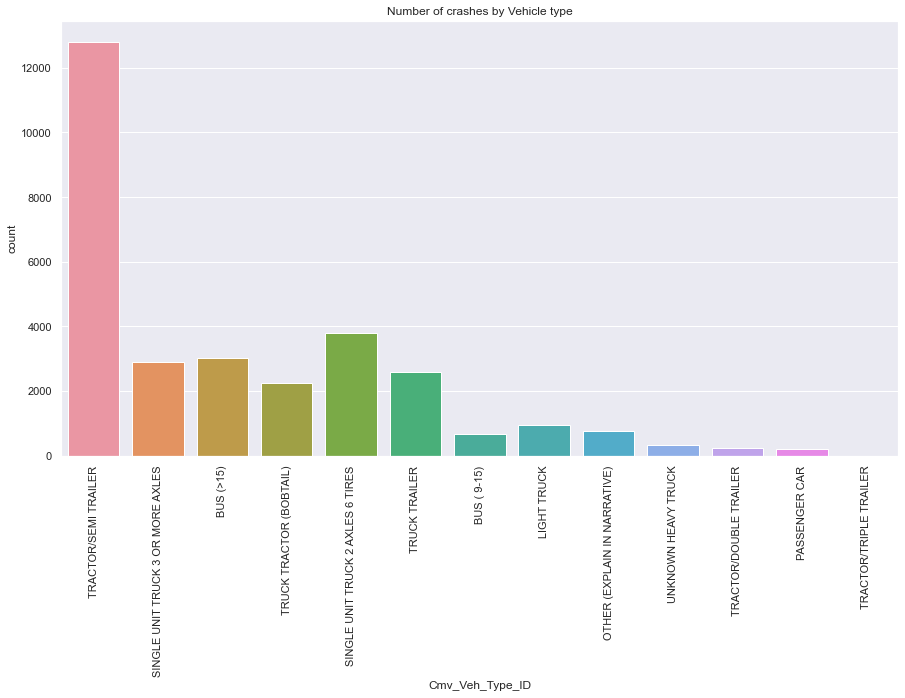

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x ='Cmv_Veh_Type_ID', data = casesu)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Number of crashes by Vehicle type')

Text(0.5, 1.0, 'Number of crashes by Weather condition')

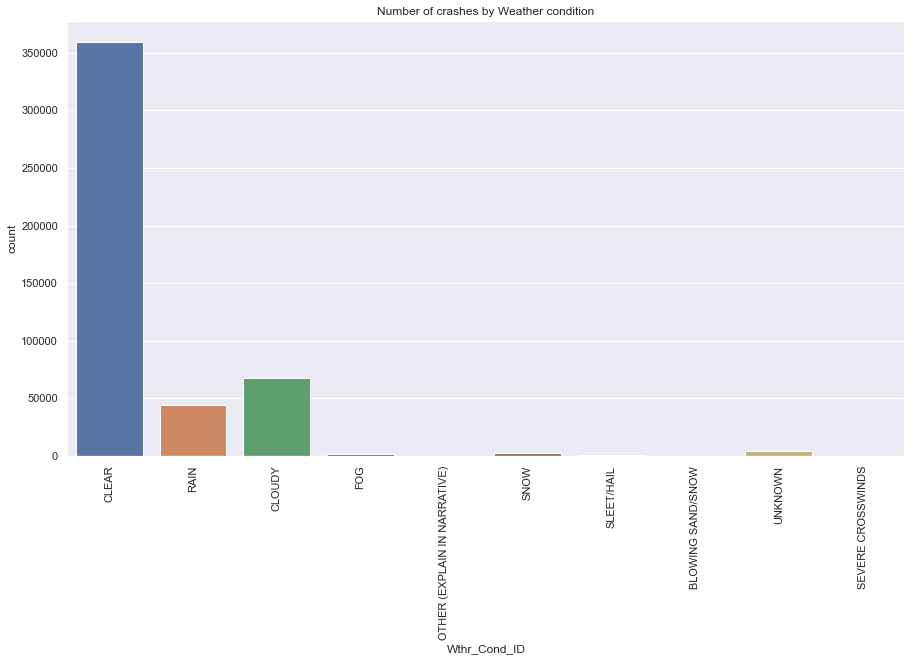

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x ='Wthr_Cond_ID', data = crashes)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Number of crashes by Weather condition')

Text(0.5, 1.0, 'Number of crashes by Light condition')

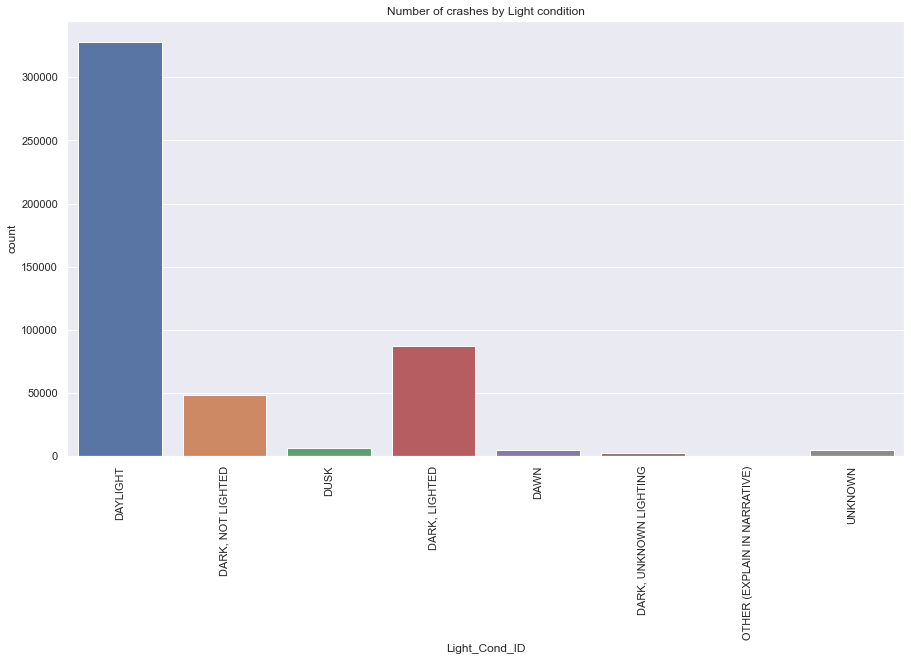

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x ='Light_Cond_ID', data = crashes)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Number of crashes by Light condition')

Text(0.5, 1.0, 'Number of crashes by the Day of the week')

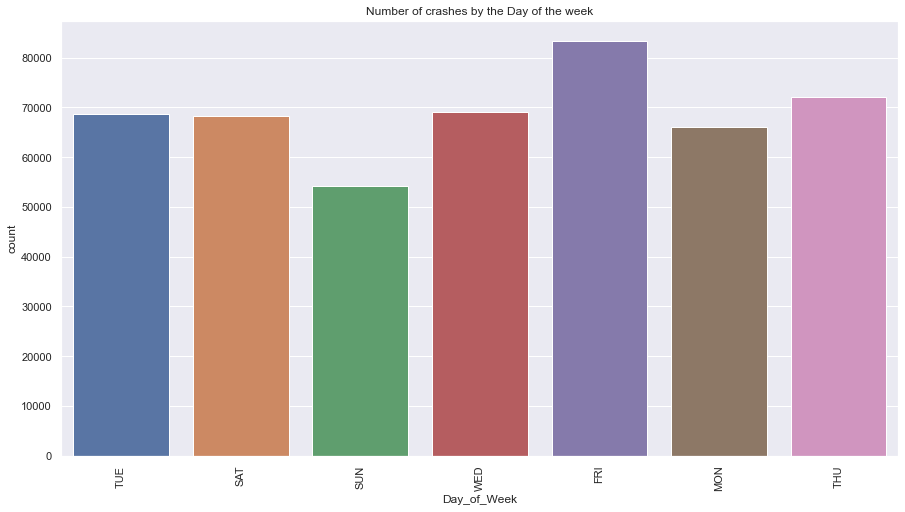

In [28]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x ='Day_of_Week', data = crashes)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Number of crashes by the Day of the week')

Text(0.5, 1.0, 'Number of crashes by surf condition')

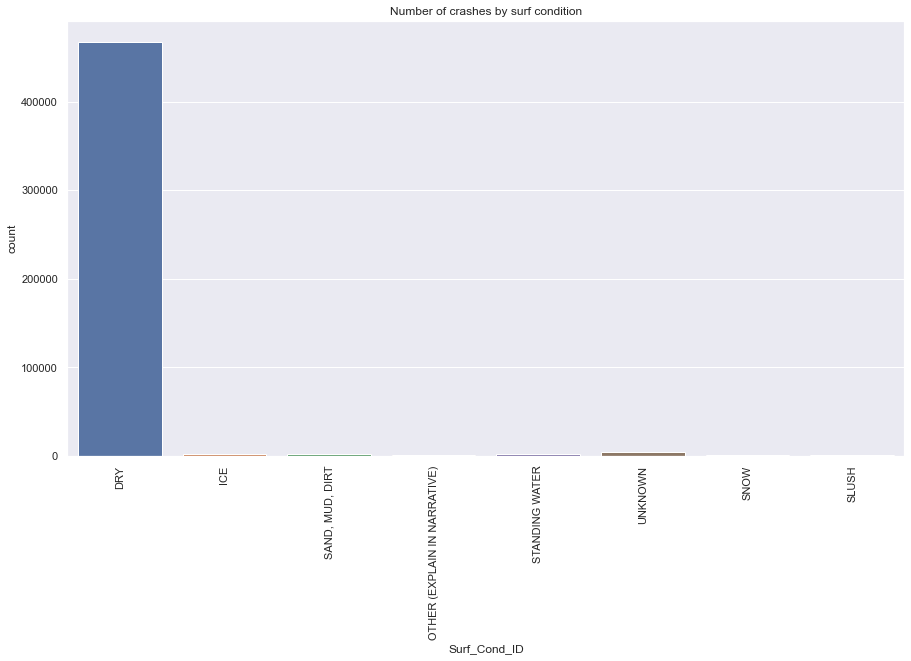

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x ='Surf_Cond_ID', data = crashes)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Number of crashes by surf condition')

Text(0.5, 1.0, 'Number of crashes by population')

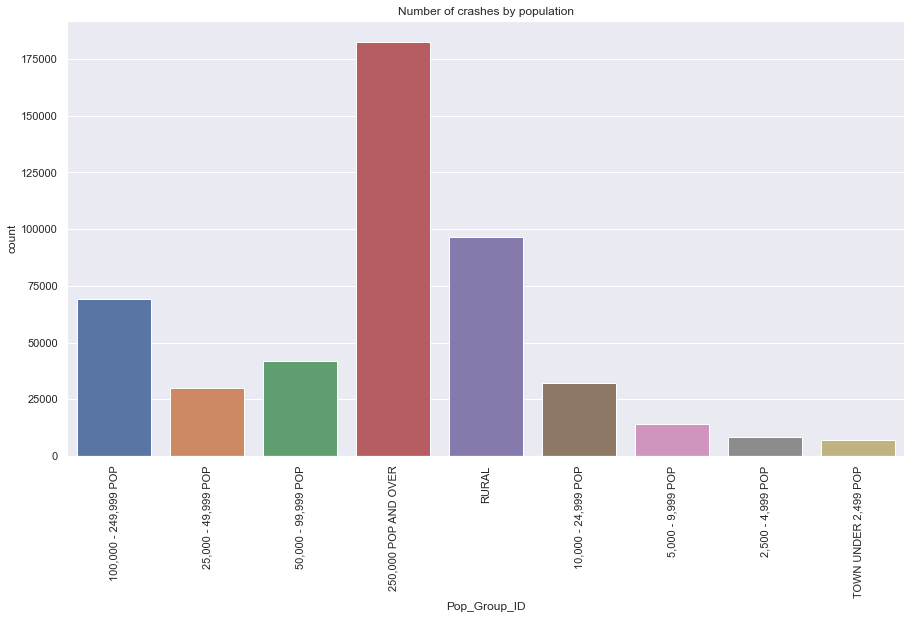

In [30]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x ='Pop_Group_ID', data = crashes)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Number of crashes by population')

In [31]:
cases.sort_index()

Prsn_Type_ID Prsn_Injry_Sev_ID  Prsn_Age  \
Crash_ID Unit_Nbr Prsn_Nbr                                                   
11152318 1        1                     DRIVER       NOT INJURED      45.0   
                  2         PASSENGER/OCCUPANT       NOT INJURED      25.0   
         2        1                     DRIVER       NOT INJURED      51.0   
                  1                     DRIVER       NOT INJURED      51.0   
11152319 1        1                     DRIVER       NOT INJURED      17.0   
...                                        ...               ...       ...   
16919340 3        33        PASSENGER/OCCUPANT       NOT INJURED      17.0   
                  34        PASSENGER/OCCUPANT       NOT INJURED      16.0   
                  35        PASSENGER/OCCUPANT       NOT INJURED      14.0   
                  36        PASSENGER/OCCUPANT       NOT INJURED      16.0   
17150192 1        1                     DRIVER       NOT INJURED      83.0   

                           Prsn_Ethnicity_ID Prsn_Gndr_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                  
11152318 1        1                    BLACK       FEMALE   
                  2                    BLACK       FEMALE   
         2        1                    WHITE         MALE   
                  1                    WHITE         MALE   
11152319 1        1                    BLACK         MALE   
...                                      ...          ...   
16919340 3        33                HISPANIC         MALE   
                  34                HISPANIC       FEMALE   
                  35                HISPANIC       FEMALE   
                  36                HISPANIC       FEMALE   
17150192 1        1                    WHITE         MALE   

                                   Prsn_Rest_ID  Prsn_Airbag_ID  \
Crash_ID Unit_Nbr Prsn_Nbr                                        
11152318 1        1         SHOULDER & LAP BELT    NOT DEPLOYED   
                  2         SHOULDER & LAP BELT    NOT DEPLOYED   
         2        1         SHOULDER & LAP BELT    NOT DEPLOYED   
                  1         SHOULDER & LAP BELT    NOT DEPLOYED   
11152319 1        1         SHOULDER & LAP BELT    NOT DEPLOYED   
...                                         ...             ...   
16919340 3        33             NOT APPLICABLE  NOT APPLICABLE   
                  34             NOT APPLICABLE  NOT APPLICABLE   
                  35             NOT APPLICABLE  NOT APPLICABLE   
                  36             NOT APPLICABLE  NOT APPLICABLE   
17150192 1        1         SHOULDER & LAP BELT  NOT APPLICABLE   

                            Prsn_Helmet_ID  Sus_Serious_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                          
11152318 1        1         NOT APPLICABLE                      0   
                  2         NOT APPLICABLE                      0   
         2        1         NOT APPLICABLE                      0   
                  1         NOT APPLICABLE                      0   
11152319 1        1         NOT APPLICABLE                      0   
...                                    ...                    ...   
16919340 3        33        NOT APPLICABLE                      0   
                  34        NOT APPLICABLE                      0   
                  35        NOT APPLICABLE                      0   
                  36        NOT APPLICABLE                      0   
17150192 1        1         NOT APPLICABLE                      0   

                            Nonincap_Injry_Cnt  Poss_Injry_Cnt  Non_Injry_Cnt  \
Crash_ID Unit_Nbr Prsn_Nbr                                                      
11152318 1        1                          0               0              1   
                  2                          0               0              1   
         2        1                          0               0              1   
                  1                          0    

In [32]:
crashes.to_csv('crashes2010.csv')
casesu.to_csv('casesu2010.csv')